##Laura Michel Bolivar 

###Importamos Librerias 

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

###Cargamos datos de la biblioteca Scikit-learn 

In [160]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()

###Creamos una tabla de datos usando pandas 

In [161]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)#Creamos una tabla ,con titulos para facilitar la manipulacion 
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [162]:
boston['MEV']= boston_dataset.target  #creacion de la columna 'MEV' con los datos de target
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###Graficamos Valores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


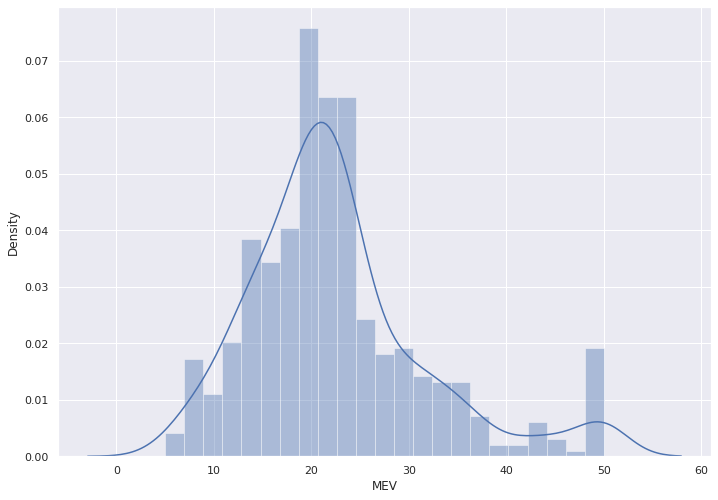

In [163]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEV'])    
plt.show()

####Matriz Correlacion

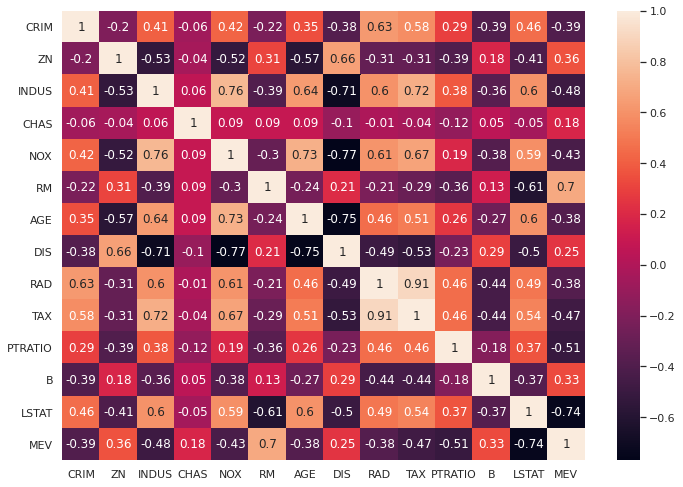

In [164]:
correlation_matrix=boston.corr().round(2) #Funcion correlacion de Pandas 
sns.heatmap(data=correlation_matrix,annot=True) 

###Relacion de MEV con respecto a los demas valores 

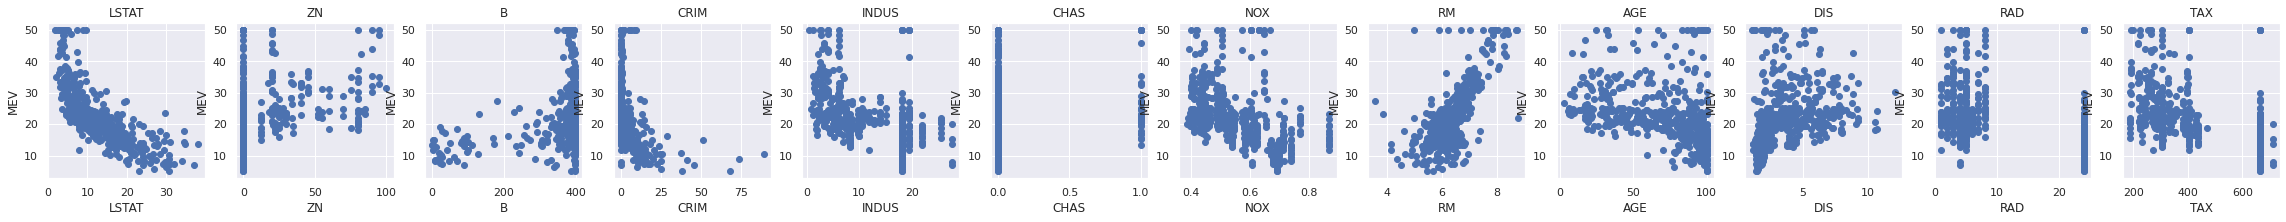

In [165]:
plt.figure(figsize=(40, 20))
features = ['LSTAT','ZN','B','CRIM','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX']
target = boston['MEV']

for i, col in enumerate(features):
    plt.subplot(6, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEV')

###Preparación de los datos para el entrenamiento del modelo

In [166]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM'],boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['RAD'], boston['ZN'], boston['CRIM'],
                       boston['NOX'],boston['AGE'],boston['B'], boston['DIS'],boston['CHAS']], 
                 columns = ['LSTAT','RM','PTRATIO','INDUS','TAX','RAD','ZN','CRIM','NOX','AGE','B','DIS','CHAS'])
Y = boston['MEV']

###Dividir los datos en conjuntos de entrenamiento (75%) y pruebas (25%)

In [167]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state=7)
print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))

x75%: (404, 13), x25%: (102, 13)
y75%: (404,), y25%: (102,)


####Verificamos el numero de valores 

In [168]:
len(X_train)
len(X_test)

102

###Entrenando un modelo de regresión lineal

In [169]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

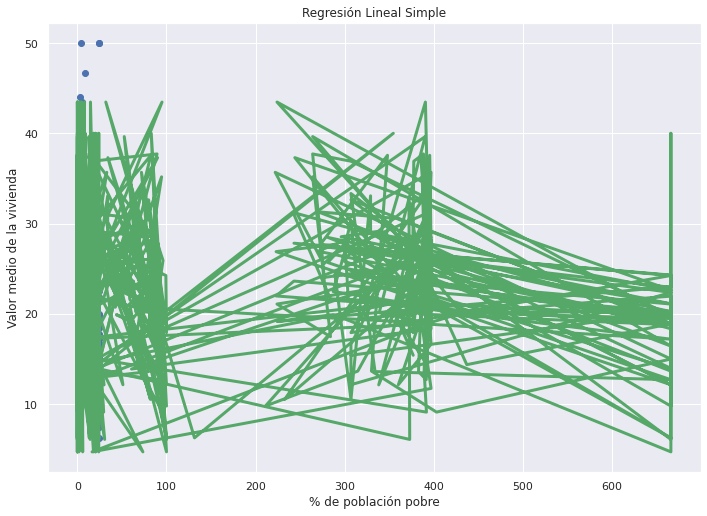


 PRECISIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.7698532963729758

Valor de la pendiente 
[-3.89712044e-01  5.27249266e+00 -9.19571148e-01  2.17990089e-02
 -1.15043029e-02  2.65804711e-01  3.04735052e-02 -1.24649091e-01
 -1.52135247e+01 -1.10577742e-02  1.01624292e-02 -1.27320872e+00
  2.79225761e+00]

Valor de la Intercepcion
23.554245467592384


In [170]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['RAD'], Y_test)
plt.plot(X_test, Y_pred, color='g', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRECISIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))
print("\nValor de la pendiente ")
print(lin_model.coef_)
print("\nValor de la Intercepcion")
print(lin_model.intercept_)
